#Task: Introspection

To build gradient based saliency maps


##  Gradient based saliency maps


The output for all the subtasks are printed as follows:
Saliency Maps for gradients (4.1), Original Image , Optimal Input (4.2)

In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


import IPython.display as display
import PIL.Image

from tensorflow.keras.preprocessing import image
from tensorflow import keras


In [ ]:
def load_dataset():
  cifar10 = tf.keras.datasets.cifar10
  (trainX , trainY) , (testX, testY) = cifar10.load_data()
  return trainX, trainY, testX, testY



In [ ]:
def deprocess(img):
  img = 255*(img + 1.0)/2.0
  return tf.cast(img, tf.float32)

def show(img):
  display.display(PIL.Image.fromarray(np.array(img)))

In [ ]:
def res_net_block(input_data, filters, conv_size):
  x = tf.keras.layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Add()([x, input_data])
  x = tf.keras.layers.Activation('relu')(x)
  return x

In [ ]:
def my_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  x = tf.keras.layers.Conv2D(64, 2, activation='relu')(inputs)
  x = tf.keras.layers.Conv2D(64, 2, activation='relu')(x)
  x = tf.keras.layers.GaussianNoise(stddev=0.1)(x)
  # x = tf.keras.layers.MaxPooling2D((2,2))(x)

  # num_res_net_blocks = 2
  # for i in range(num_res_net_blocks):
  #     x = res_net_block(x, 64, 2)
  x = tf.keras.layers.Conv2D(64, 2, activation='relu')(x)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  # x = tf.keras.layers.Dropout(0.5)(x)
  outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
  model = tf.keras.Model(inputs, outputs)
  return model

In [ ]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)

In [ ]:
model = my_model()

In [ ]:
def run_deep_dream_simple(img, steps):
  step_size = 0.005
  opt = tf.optimizers.Adam()
  loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True , name='loss')
  train_acc_metric = tf.metrics.SparseCategoricalAccuracy(name ='acc')
  train_steps = steps
  for step,(img_batch,y) in enumerate(data):
    if step > 5:
      break
    original_img = img_batch
    for step in range(train_steps):
      with tf.GradientTape() as tape:
        tape.watch(img_batch)
        loss = calc_loss(img_batch, model)
      grads = tape.gradient(loss, img_batch)
      grads = tf.math.sign(grads)
      grads /= tf.math.reduce_std(grads) + 1e-8
      img_batch = img_batch +grads * step_size
      img_batch = img_batch +grads * step_size
      img_batch = tf.clip_by_value(img_batch,0,1)

    plt.imshow(grads[0])
    plt.show()

    plt.imshow(original_img[0])
    plt.show()

    plt.imshow(img_batch[0])
    plt.show()

  return 

In [ ]:
trainX, trainY, testX, testY = load_dataset()
data = tf.data.Dataset.from_tensor_slices(
    (trainX.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, trainY.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(1)
test_data = tf.data.Dataset.from_tensor_slices(
    (testX.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, testY.astype(np.int32))).batch(128)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


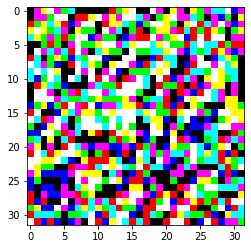

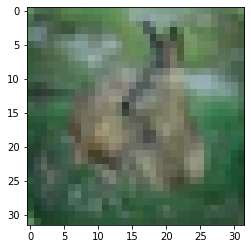

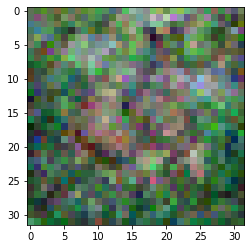

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


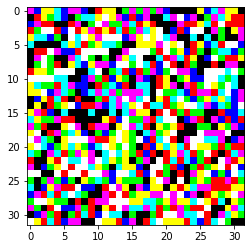

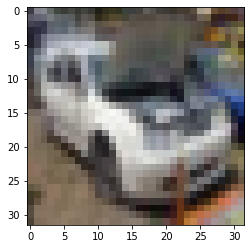

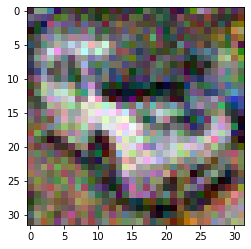

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


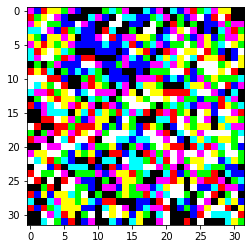

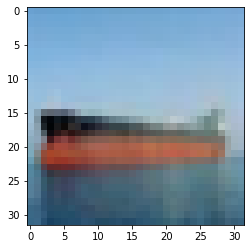

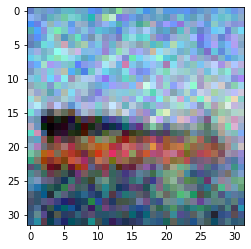

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


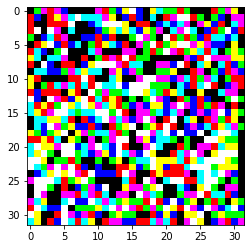

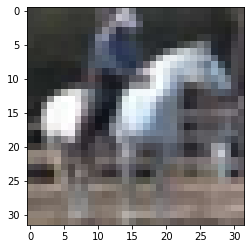

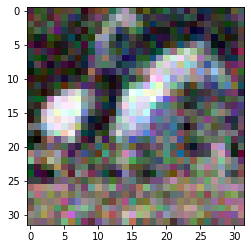

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


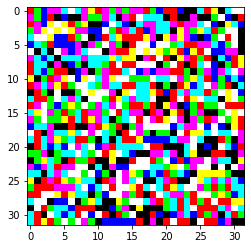

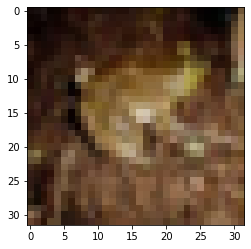

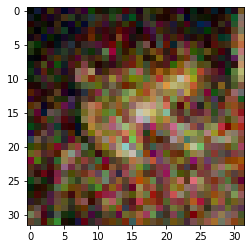

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


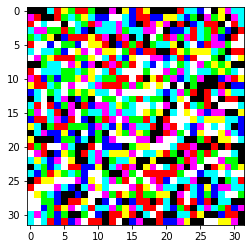

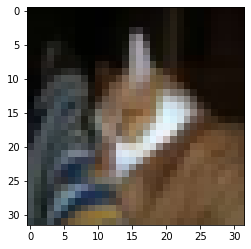

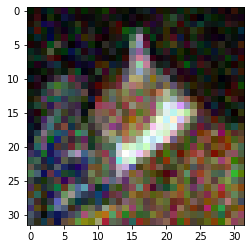

In [ ]:
dream_img = run_deep_dream_simple(img=data, 
                                  steps=100)

###Observations for 4.1:

When viewing the saliency maps from certain corners, some pixels are almost the same color. But overall the gradient saliency maps are quite arbitrary as compared to the original picture.

Increasing the training steps from 100 to 300

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


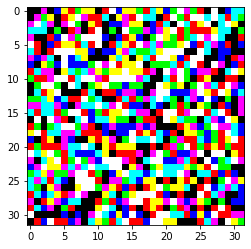

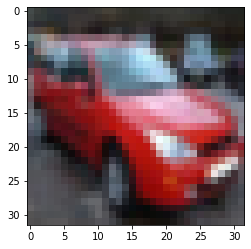

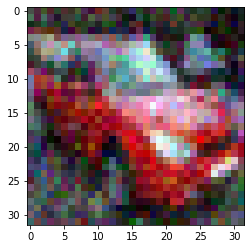

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


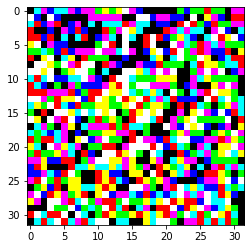

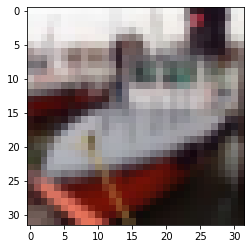

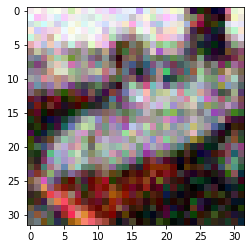

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


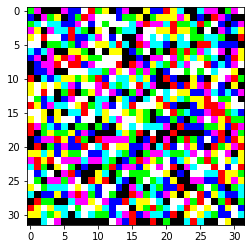

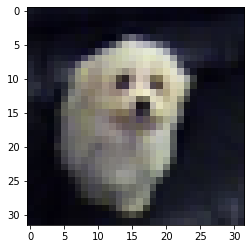

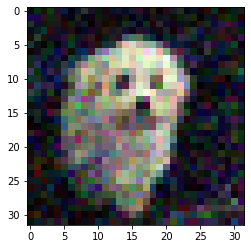

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


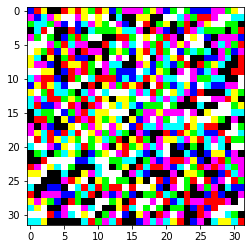

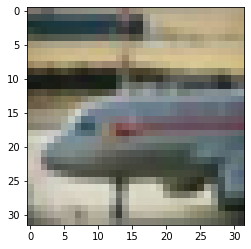

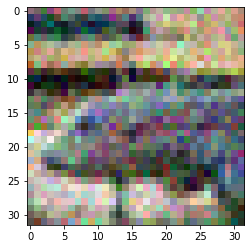

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


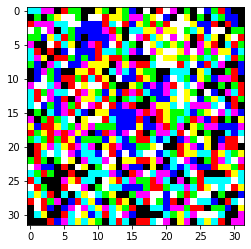

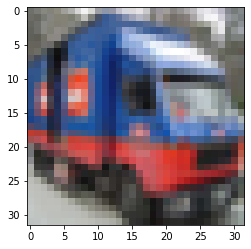

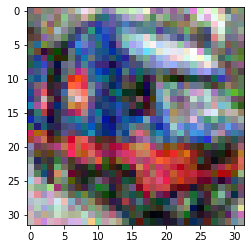

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


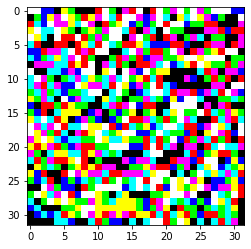

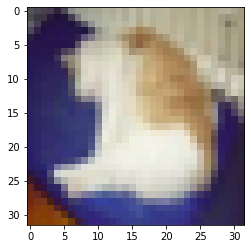

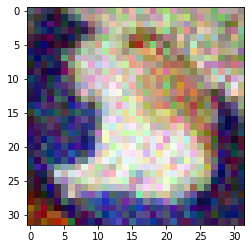

In [ ]:
dream_img = run_deep_dream_simple(img=data, 
                                  steps=700)

Adding noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


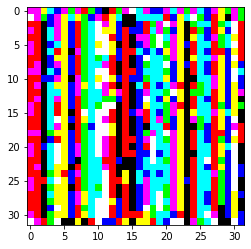

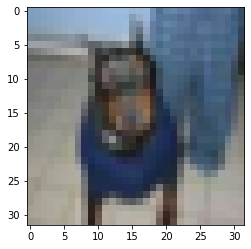

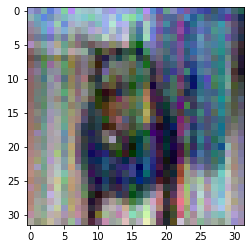

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


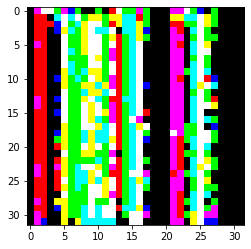

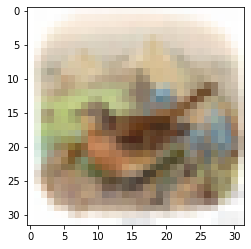

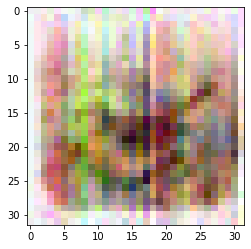

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


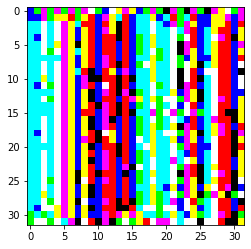

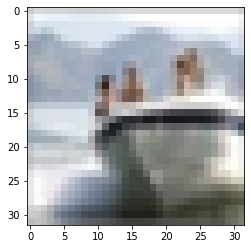

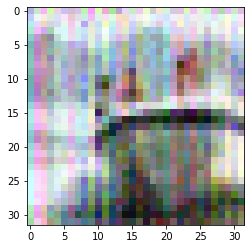

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


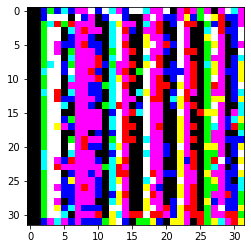

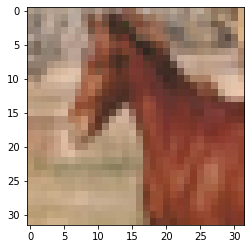

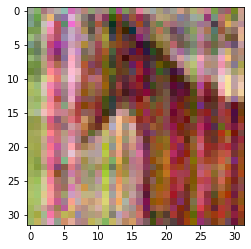

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


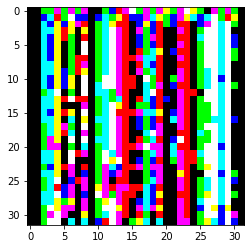

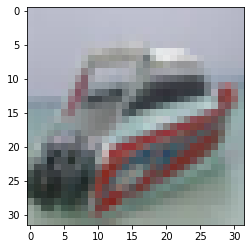

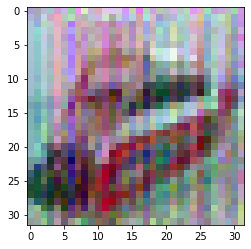

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


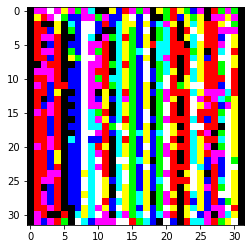

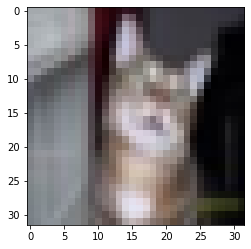

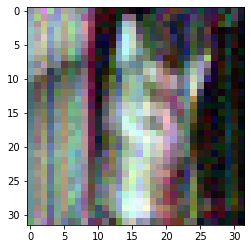

In [ ]:
dream_img = run_deep_dream_simple(img=data, 
                                  steps=100)

###Observations for 4.2
1. Does the resulting input look natural?
The resulting input does look similar to the original image 

2. How does the inputs change when applying many steps of optimization?
After applying many steps, the input makes little more sharp.

3. How do the optimal inputs differ when initializing the optimization with random noise instead of real examples?
Initialising with noise makes the optimal inputs less natural in comparison to the original image.